# Spam Prediction

### 1. Importing Necessary Library

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer# Text to number
from sklearn.model_selection import train_test_split # test data and train data
from sklearn.metrics import accuracy_score# Accuracy check
from sklearn.linear_model import LogisticRegression# Model prediction



### 2. Importing Data 

In [2]:
dataset = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [3]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### 3. Data Preprocessing And Analysis




In [4]:
dataset=dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
dataset=dataset.rename(columns={'v1':'category',
                                'v2':'message'
                               })

In [6]:
dataset

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
dataset.shape

(5572, 2)

In [8]:
dataset.isnull().sum()

category    0
message     0
dtype: int64

In [9]:
dataset.head(10)

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [10]:
dataset.tail(10)

,category,message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [11]:
dataset.loc[dataset['category']=='spam','category']=1
dataset.loc[dataset['category']=='ham','category']=0

([<matplotlib.patches.Wedge at 0x20cc365fc70>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'normal'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')])

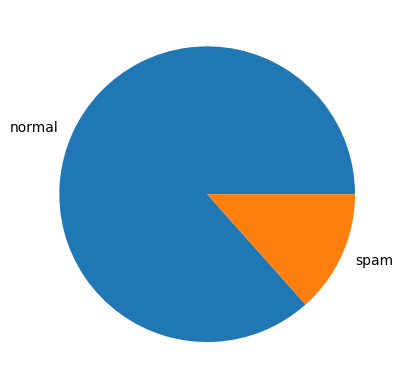

In [12]:
labels=['normal','spam']
plt.pie(dataset.category.value_counts(),labels=labels )


In [13]:
X_train=dataset.message
Y_train=dataset.category


### 4. Splitting Data (Train,Test)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.1,random_state=2)

In [15]:
y_train=y_train.astype(int)

### 5. Converting Text To Feature Vector Using Tfidfvectorizer


In [16]:
vectorizer=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)


x_train_tfidf=vectorizer.fit_transform(x_train)


x_test_tfidf=vectorizer.transform(x_test)

# There are no any repeated message so we will use min_df=1

### 6. Model Prediction Using Logistic Regression


In [17]:
model=LogisticRegression()
model.fit(x_train_tfidf,y_train)
model_prediction=model.predict(x_train_tfidf)


### 7. Accuracy Check

In [18]:
accuracy_score(y_train,model_prediction)


0.9714798564020742

### 8. Prediction

Some of the spam mail:
- URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net   LCCLTD POBOX 4403LDNW1A7RW18
- Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged

In [26]:
input_mail =input()

feature_extraction = vectorizer.transform([input_mail])


model_prediction = model.predict(feature_extraction)
# print(model_prediction)


if (model_prediction[0]==1):
  print('Spam')

else:
  print('Not Spam')

Some of the spam mail:
Not Spam


### 9. For Model Creation

In [ ]:
# from joblib import dump
# dump(model,'model.joblib')# You can use this model to host in web using different framework like django /flask and so on.